# Introducción

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carga el archivo de datos en un DataFrame
## Aqui especificamos que la columna date_posted debe de cambiarse a datetime.
data = pd.read_csv('/datasets/vehicles_us.csv', parse_dates=['date_posted'])

In [ ]:
# imprime la información general/resumida sobre el DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB
None


In [ ]:
# imprimir una muestra de datos
print(data.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

- Existen valores ausentes en varias columnas, de igual manera puedo intuir que habrá valores atípicos en los datos

- En algunas columnas podemos observar que sus valores podrian estar en datetime como date_posted o algunas podrian ser cambiadas a int64 como model_year y cylinders.

- No hay valores ausentes en todas las columnas pero si en bastantes. Donde mas hay es en 'is_4wd' y 'paint_color'

In [ ]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [ ]:
print(data['is_4wd'].unique())

[ 1. nan]


- Viendo los valores unicos de la columna 'is_4wd' podemos intuir que 1.0 representa un valor booleando True y 0.0 deberia representar False, entonces imputare dichos valores NaN con 0.0

In [ ]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [ ]:
print(data['is_4wd'].isna().sum())

0


- Debido a que el color de la pintura de los autos puede ser cualquiera y no hay un indicio que nos diga con que valor imputar, decidi poner 'not specified' para reemplazar los valores ausentes con un valor medible a pesar de que no sea parte de los colores ya impuestos.

In [ ]:
data['paint_color'] = data['paint_color'].fillna('not specified')

In [ ]:
median_model_year = data.groupby('model')['model_year'].median()
def fill_model_year(row):
    model_year = row['model_year']
    model = row['model']

    if np.isnan(model_year):
        return median_model_year[model]
    else:
        return model_year
data['model_year'] = data.apply(fill_model_year, axis= 1)

- Aqui he decidido imputar los valores de model_year dependiendo de su mediana con respecto a model, dicho de otra manera, agrupando model y model_year y sacando su mediana con respecto a un modelo similar.

In [ ]:
data['model_year'].isna().sum()

0

In [ ]:
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [ ]:
number_cylinders = data.pivot_table(columns='model', values='cylinders', aggfunc='count')
number_cylinders

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
cylinders,211,251,247,294,372,281,264,461,408,535,...,284,573,299,432,413,294,730,547,466,316


In [ ]:
median_cylinder = data.groupby('model')['cylinders'].median()
def fill_cylinders(row):
    cylinders = row['cylinders']
    model = row['model']

    if np.isnan(cylinders):
        return median_cylinder[model]
    else:
        return cylinders
data['cylinders'] = data.apply(fill_cylinders, axis= 1)

In [ ]:
data['cylinders'].isna().sum()

0

- En esta función rellenamos el valor de cylinders cuando es NaN con la media dependiendo del modelo, es decir, si hay un modelo con el mismo nombre va a agarrar la media de sus cilindros y va a imputar el numero de cilindros para ese valor ausente

In [ ]:
median_odometer = data.groupby('model_year')['odometer'].median()
def fill_odometer(row):
    odometer = row['odometer']
    model_year = row['model_year']

    if np.isnan(odometer):
        return median_odometer[model_year]
    else:
        return odometer
data['odometer'] = data.apply(fill_odometer, axis= 1)

In [ ]:
data['odometer'].isna().sum()

1

In [ ]:
print(data['odometer'].median())
data['odometer'] = data['odometer'].fillna(114074.0)

114074.0


In [ ]:
data['odometer'].isna().sum()

0

- Aqui con esta función rellenamos los valores ausentes con la mediana de odometer respecto a su año de modelo, como podemos observar nos sobro 1 dato que seguía teniendo valor ausente pero como no demuestra un valor significativo lo eliminamos.

In [ ]:
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

- Finalmente podemos observar que todos los valores ausentes han sido tratados de manera apropiada por lo cual podemos proceder a seguir depurando los datos y algún valor atípico que podamos encontrar.

In [ ]:
# Aqui cambiamos el tipo de dato de model_year de float a int debido a que al ser años no tiene congruencia que se deje como float.
data['model_year'] = data['model_year'].astype('int64')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,not specified,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,not specified,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [ ]:
# Aqui, al igual que en la columna pasada, cambiamos el tipo de dato de cylinders de float a int debido a que al un numero entero no tiene congruencia que se deje como float.
data['cylinders'] = data['cylinders'].astype('int64')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,not specified,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,not specified,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [ ]:
# Aqui, al igual que en la columna pasada, cambiamos el tipo de dato de is_4wd de float a bool debido a que al ser un valor 1 o 0 no tiene congruencia que se deje como float.
data['is_4wd'] = data['is_4wd'].astype('bool')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,not specified,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,not specified,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [ ]:
# Aqui, al igual que en la columna pasada, cambiamos el tipo de dato de odometer de float a int64 debido a que al ser un numero entero no tiene congruencia que se deje como obj.
data['odometer'] = data['odometer'].astype('int64')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not specified,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,not specified,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


In [ ]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['years_posted'] = data['date_posted'].dt.strftime('%Y')
data['years_posted'] = ((data['years_posted'].astype('int64')) - (data['model_year']) + 1)
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,not specified,True,2018-06-23,19,8
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,not specified,False,2019-03-22,9,17
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6


In [ ]:
# Agrega el millaje promedio del vehículo por año
data['mean_mileage'] = (data['odometer'] / data['years_posted']).round()

In [ ]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
def rangos_condition(row):
    condition = row['condition']
    if condition == 'new':
        return '5'
    if condition == 'like new':
        return '4'
    if condition == 'excellent':
        return '3'
    if condition == 'good':
        return '2'
    if condition == 'fair':
        return '1'
    else:
        return '0'
data['condition'] = data.apply(rangos_condition, axis=1)

In [ ]:
# Aqui cambiamos condition a int para poder manipularlo
data['condition'] = data['condition'].astype('int64')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_posted,mean_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,not specified,True,2018-06-23,19,8,18125.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714.0
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,not specified,False,2019-03-22,9,17,9494.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26968.0


In [ ]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  years_posted  51525 non-null  int64         
 14  mean_mileage  51525 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float

In [ ]:
# imprimir una muestra de datos
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_posted,mean_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,not specified,True,2018-06-23,19,8,18125.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714.0
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,not specified,False,2019-03-22,9,17,9494.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26968.0
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,5,11591.0
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,4,19803.0
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,7,15639.0
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,not specified,True,2018-07-16,19,7,14882.0
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,12,12266.0


In [ ]:
parameters = data.loc[:, ('price', 'years_posted', 'cylinders', 'condition', 'odometer')]

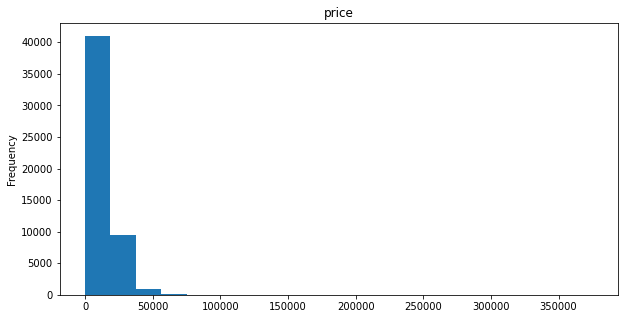

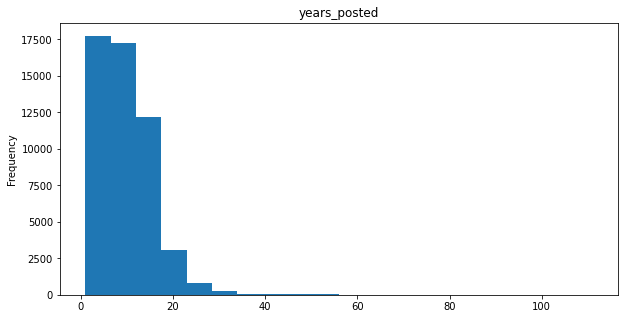

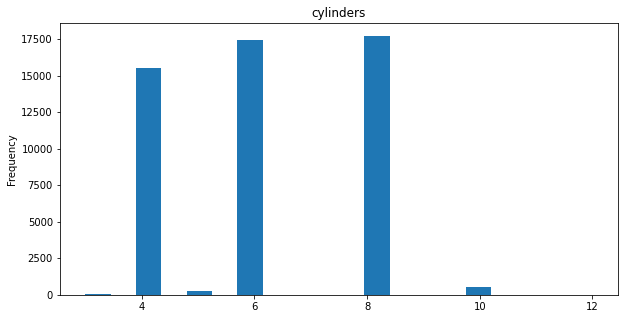

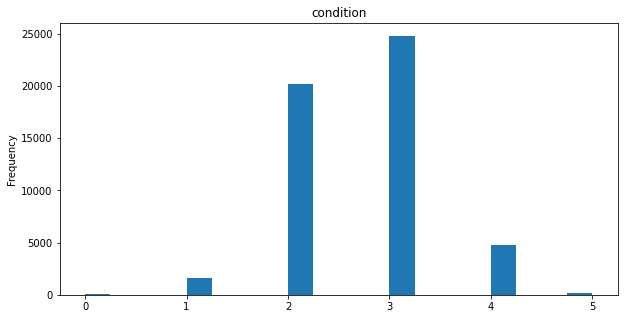

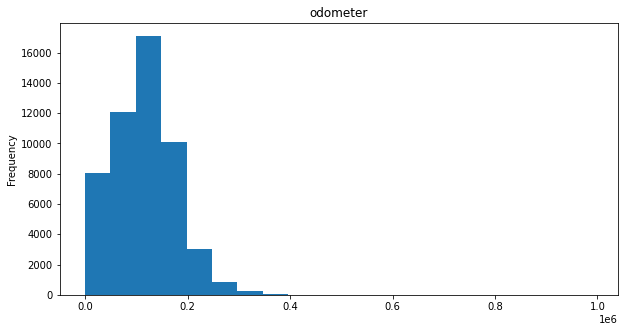

In [ ]:
# Creamos un bucle for para calcular todos los histogramas de las variables o parametros relevantes
for col in parameters:
    parameters[col].plot(kind='hist', bins=20, figsize=(10,5), title=col)
    plt.show()

In [ ]:
# Aqui se crea una funcion que calcule los cuantiles, el iqr, limite inferior y superior para cada columna y nos devuelve el dataframe ya filtrado.
filtered_data = data.copy()
def remove_outliers(filtered_data, nombre_col):
    q1 = filtered_data[nombre_col].quantile(0.25)
    q3 = filtered_data[nombre_col].quantile(0.75)
    iqr = q3 - q1
    lower = int(q1 - (1.5*iqr))
    upper = int(q3 + (1.5*iqr))
    return data.query(f'@lower <= {nombre_col} <= @upper')
good_price = remove_outliers(filtered_data, 'price')
good_yearsposted = remove_outliers(filtered_data, 'years_posted')
good_odometer = remove_outliers(filtered_data, 'odometer')
good_data1 = good_price.merge(good_yearsposted)
good_data = good_data1.merge(good_odometer)

In [ ]:
good_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_posted,mean_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,not specified,True,2018-06-23,19,8,18125.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,11088.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714.0
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,not specified,False,2019-03-22,9,17,9494.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48549,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6,14689.0
48550,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17,10676.0
48551,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10,12800.0
48552,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6,23262.0


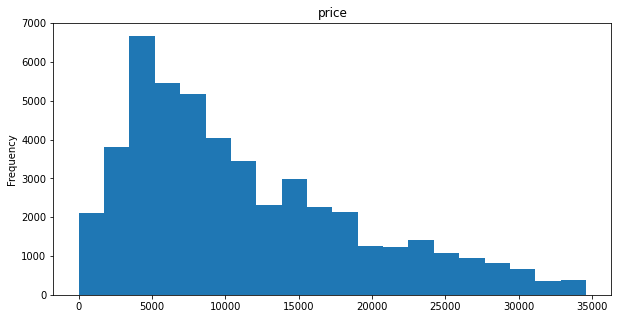

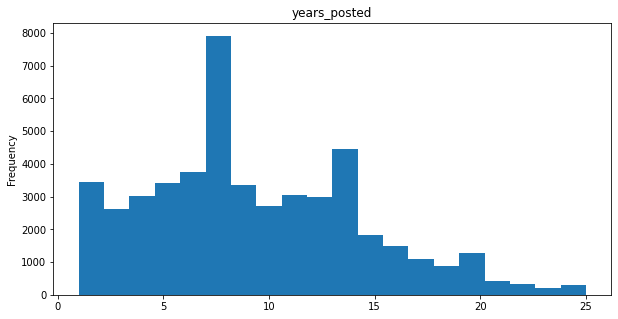

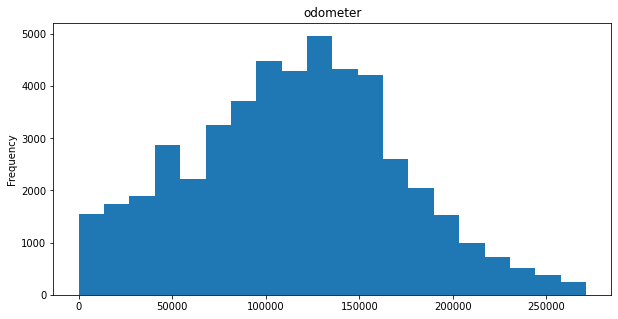

In [ ]:
parameters2 = good_data.loc[:, ('price', 'years_posted','odometer')]
for col in parameters2:
    good_data[col].plot(kind='hist', bins=20, figsize=(10,5), title=col)
    plt.show()

- Sin valores atipicos tenemos una distribucion mas normal con respecto a los parametros establecidos.

In [ ]:
# Aqui calculamos la media y la mediana de la cantidad de dias que un auto estuvo posteado
print(data['days_listed'].describe())

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64


In [ ]:
# Aqui colocamos el tiempo que dura posteado un auto
data['days_listed'].describe()['75%']

53.0

- El promedio de tiempo que dura un auto posteado es de 53 dias, estamos utilizando el 75% debido a que 3/4 autos se vende en un maximo de 53 dias, hay valores atipicos en la muestra por ende no podemos considerar la media para definir la hipotesis.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6cfec77df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6cfec084f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6cfec77a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6cfec08bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6cfec08f10>],
 'means': []}

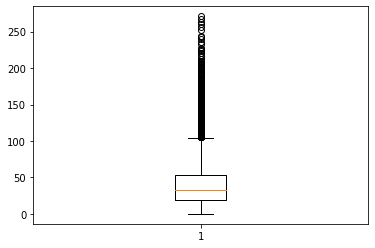

In [ ]:
plt.boxplot(data['days_listed'])

- Tras una investigación profunda de todos los parametros para definir si existia una correlacion entre los coches que se vendieron pronto con los que no, no podemos concluir con que exista una correlacion. Dicho de otra forma no podemos explicar el por que un anuncio tarda mucho o poco despues de ser posteado asi como tampoco podemos definir que es atipicamente corto y que es atipicamente largo.

(array([2.0799e+04, 1.8375e+04, 8.0180e+03, 2.9750e+03, 9.1700e+02,
        3.0400e+02, 8.7000e+01, 3.2000e+01, 1.1000e+01, 7.0000e+00]),
 array([  0. ,  27.1,  54.2,  81.3, 108.4, 135.5, 162.6, 189.7, 216.8,
        243.9, 271. ]),
 <BarContainer object of 10 artists>)

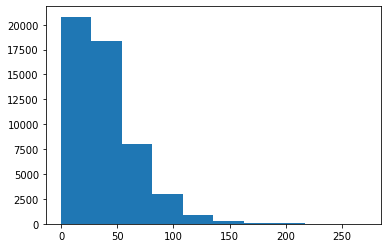

In [ ]:
plt.hist(data['days_listed'])

- Si tuviera que dar una respuesta diria que los valores atipicamente largos son superiores a los 60 dias posteados y 0 dias seria atipicamente corto.

51525
***************


<AxesSubplot:xlabel='type'>

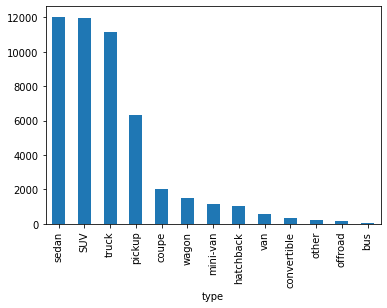

In [ ]:
print(len(data['days_listed']))
data1 = good_data.groupby('type')['price'].agg(func='mean')
print('*'*15)
plot_type_price = good_data.pivot_table(index='type', values='price', aggfunc='count')
plot_type_sorted = plot_type_price['price'].sort_values(ascending=False)
plot_type_sorted.plot(kind='bar')

In [ ]:
# Aqui crearemos los dos dataframes filtrados a los dos vehiculos mas populares que son SUV y sedan
sedan_type = good_data.query('type == "sedan"')
suv_type = good_data.query('type == "SUV"')

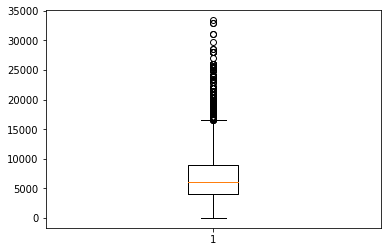

In [ ]:
# Aqui trabajeremos primero sobre el sedan
plt.boxplot(sedan_type['price'])
plt.show()

In [ ]:
# Las correlaciones con sedan
print(sedan_type['price'].corr(sedan_type['model_year']))
print(sedan_type['price'].corr(sedan_type['condition']))
print(sedan_type['price'].corr(sedan_type['years_posted']))
print(sedan_type['price'].corr(sedan_type['is_4wd']))
print(sedan_type['price'].corr(sedan_type['odometer']))

0.6188611493429222
0.2936511442529821
-0.6154039722575414
0.04082450838902464
-0.5634824129326048


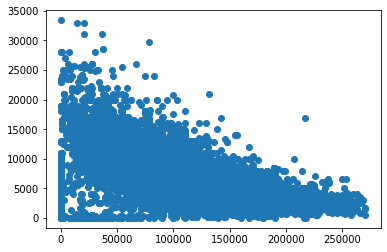

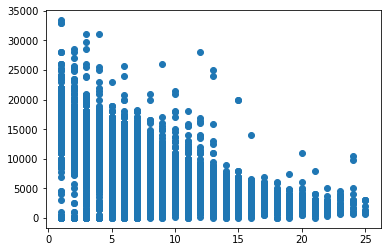

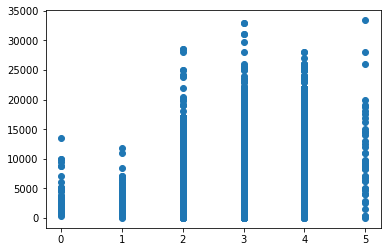

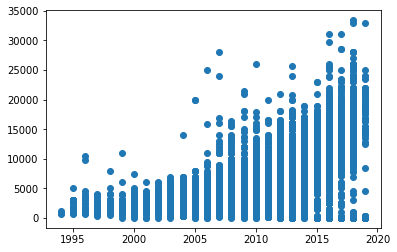

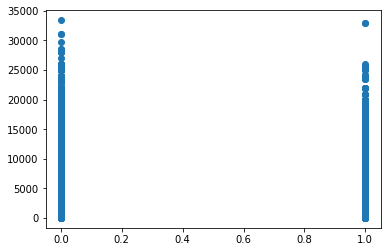

In [ ]:
plt.scatter(sedan_type['odometer'], sedan_type['price'])
plt.show()
plt.scatter(sedan_type['years_posted'] ,sedan_type['price'])
plt.show()
plt.scatter(sedan_type['condition'] ,sedan_type['price'])
plt.show()
plt.scatter(sedan_type['model_year'] ,sedan_type['price'])
plt.show()
plt.scatter(sedan_type['is_4wd'] ,sedan_type['price'])
plt.show()

- Tras haber investigado las correlaciones y realizado un analisis grafico podemos observar que no existe correlacion entre el precio y ninguna de las variables debido a que todas tienden a 0.

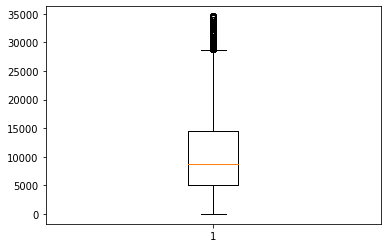

In [ ]:
# Aqui trabajaremos sobre SUV
plt.boxplot(suv_type['price'])
plt.show()

<AxesSubplot:>

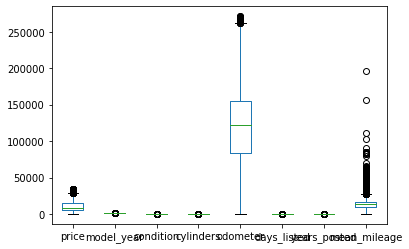

In [ ]:
suv_type.plot(kind='box')

In [ ]:
# Las correlaciones con SUV
print(suv_type['price'].corr(suv_type['model_year']))
print(suv_type['price'].corr(suv_type['condition']))
print(suv_type['price'].corr(suv_type['years_posted']))
print(suv_type['price'].corr(suv_type['is_4wd']))
print(suv_type['price'].corr(suv_type['odometer']))

0.5770925813821247
0.26398907805170096
-0.5751379481422204
0.11188963859832168
-0.5227759774311167


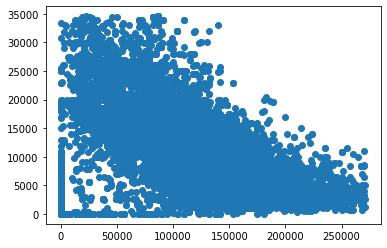

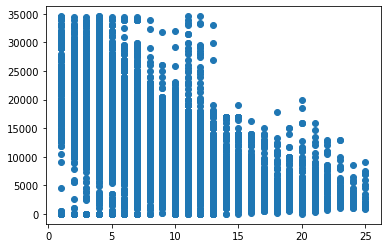

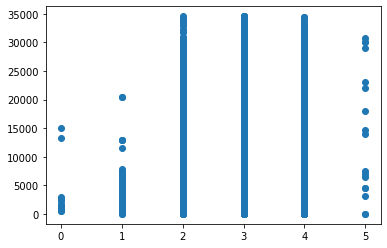

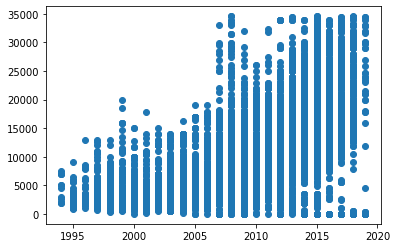

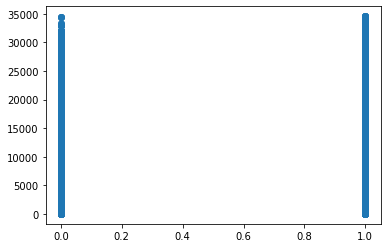

In [ ]:
plt.scatter(suv_type['odometer'], suv_type['price'])
plt.show()
plt.scatter(suv_type['years_posted'] ,suv_type['price'])
plt.show()
plt.scatter(suv_type['condition'] ,suv_type['price'])
plt.show()
plt.scatter(suv_type['model_year'] ,suv_type['price'])
plt.show()
plt.scatter(suv_type['is_4wd'] ,suv_type['price'])
plt.show()

- Tras haber investigado las correlaciones y realizado un analisis grafico podemos observar que no existe correlacion entre el precio y ninguna de las variables debido a que todas tienden a 0.

## Conclusión general

- Al inciiar el proyecto me enfoque en depurar los datos lo mas posible eliminando e imputando valores para los valores ausentes para tener un dataframe mas limpio.
- De igual manera por medio de los graficos se hizo mas visual y evidente los valores atipicos del problema.
- Al no tener manera de saber de donde pertenecian los valores ausentes del color del vehiculo decidi imputarlo con 'not specified' ya que no representaria un cambio significativo de momento para los datos que estaba buscando.
- Para model_year se imputo con la mediana de valores de los datos cuyo modelo de vehiculo y año fueran los mismos para que guardaran una correlacion con los demas datos similares.
- Igualmente para is_4wd se intuyo que al ser una columna booleana los 0 serian false y los 1 true, entonces simplemente se opto por imputar que se rellenaran los NaN con 0.
- Para la columna condition se sustituyo con valores mas manipulables.
- Se modificaron algunos de los tipos de datos debido a que eran mas apropiados de otra manera.